# CS 530 Data Mining In-Class -SGD 

## Question 1: 
In his question we will practice gradient descent (GD) and stochastic gradient descent (SDG). 

(a) Below we have a 3D function
$$z = f(x,y) = x \cdot e^{-x^2-y^2}.$$ 

It is plotted in the range $x,y \in [-5,5]$ below. First, let us implement GD. To do so, you will compute the gradient by hand. Then write a function that traverses down the gradient of $f(x,y)$ from a given starting point (or $(x_0,y_0)$), with a given step size (or learning rates, or $\eta$), and with a given number of overall steps (or iterations, or $n$). Finally, use that function to plot one GD trajectory from some starting point and with some learning rate and some number of iterations. Has the GD process converged to a minimum? If not, increase the number of iterations until it converges. Show the plot of the path of the GD on $f(x,y)$.

(b) Let us try different 3D function
$$z = f(x,y) = sin(x) \cdot x + \frac{x}{2} + \frac{y^2}{10}.$$ 
Plot it in the range $x \in [-10,10]$ and $y \in [-2,2]$. Again, compute the gradient by hand and write a function that traverses down the gradient of $f(x,y)$ from some $(x_0,y_0)$ with a given $\eta$ and a given $n$ of overall GD steps. Now traverse down the gradient from $(x_0,y_0)=(7.8,1)$ and $\eta=0.1$. If we define convergence as a step down the gradient that is less than $0.001$ in distance, what is the minimal $n$ for which the GD converges? And to which $(x,y,z)$ does it converge? Plot the path for that GD. 

(c) If we change $\eta=1$ and start the GD process again from $(x_0,y_0)=(7.8,1)$, what is the minimal $n$ for which the GD converges (in the sense defined in (b))? To which $(x,y,z)$ does the GD process converge this time? Plot the path for that GD. If $z=f(x,y)$ is a cost function of $x$ and $y$, which $\eta$ would it be better that we use $(x_0,y_0)=(7.8,1)$? In class we discussed larger $\eta$ being sometimes able to move the GD process past local minima. What possible problem that stems from choosing a large $\eta$'s have we encountered in this case?  

Now try $x=2, y=-10$. To which (x,y) does the GD converge? 
Try different starting points and see whether the GD process converges to the same minimum. Explain why it always converges to the same minimum or why it does not.

The goal of this task is to gain intuition on how the learning rate, number of interations, and the starting point can influence how/when you reach your global minimum.  

### Part a

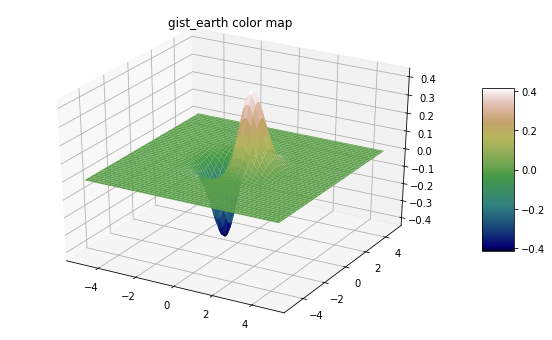

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import plotly.express as px


fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

mycmap = plt.get_cmap('gist_earth')
ax1.set_title('gist_earth color map')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

In [ ]:
def gradient(X,Y):
  return np.array([-(2*(X**2)-1)*np.exp(-X**2-Y**2),-2*X*Y*np.exp(-X**2 - Y**2)]).astype(float)

In [ ]:
def z(vector):
  return vector[0]*np.exp(-vector[0]**2 - vector[1]**2)

In [ ]:
# Runs for n_iter
def gradient_descent(start, learn_rate, n_iter):
    vector = start
    vectors = np.array([vector[0],vector[1],z(vector)])
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector[0],vector[1])
        vector += diff.astype(float)
        vectors = np.append(vectors,np.array([vector[0],vector[1],z(vector)]))
    return vector, np.array(vectors).reshape(n_iter+1,3)

#### Comparing Learning Rates

Learning Rate: 1  Min: 2.7038815277968238e-05


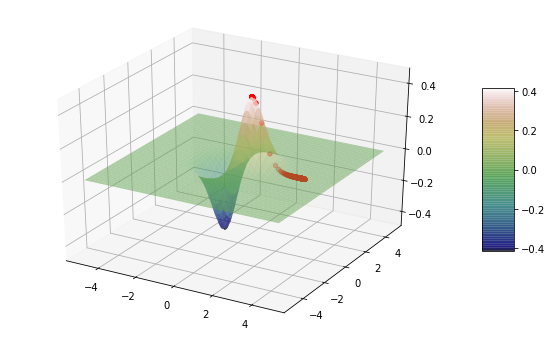

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors = gradient_descent(start=np.array([(2**(1/2))/2,0]).astype(float), learn_rate=1, n_iter=1000)
print("Learning Rate:",1," Min:",z(vector))

ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Learning Rate: 1  Min: 0.42888194248035333


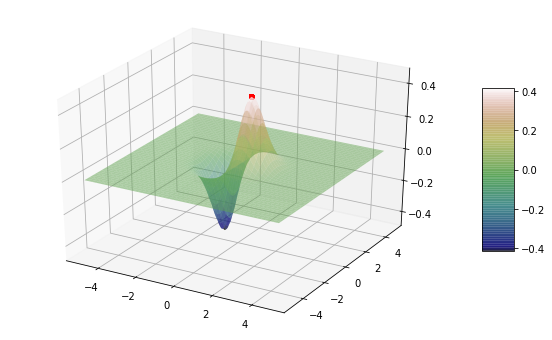

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors = gradient_descent(start=np.array([(2**(1/2))/2,0]).astype(float), learn_rate=.1, n_iter=1000)
print("Learning Rate:",1," Min:",z(vector))

ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Learning Rate: 20  Min: 6.248157646473341e-23


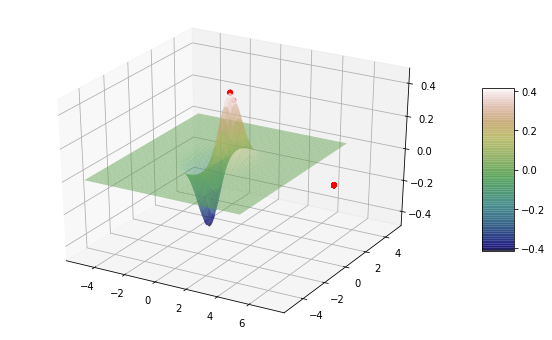

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors = gradient_descent(start=np.array([(2**(1/2))/2,0]).astype(float), learn_rate=20, n_iter=1000)
print("Learning Rate:",20," Min:",z(vector))

ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Discussion: Higher learning rates allow you to reach local minimum quicker, but too high can lead to a jumpy behavior (20). Too low of a learning rate can prevent gradient descent would require far more iterations and thus make the algorithm slow (0.1).

#### Comparing Starting Positions

Position: 0.7071067811865476 , 0  Min: 2.7038815277968238e-05


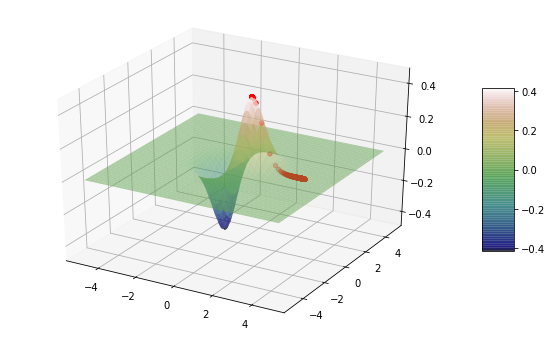

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors = gradient_descent(start=np.array([(2**(1/2))/2,0]).astype(float), learn_rate=1, n_iter=1000)
print("Position:",(2**(1/2))/2,",",0," Min:",z(vector))

ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Position: -0.7071067811865476 , 0  Min: -0.42888194248035333


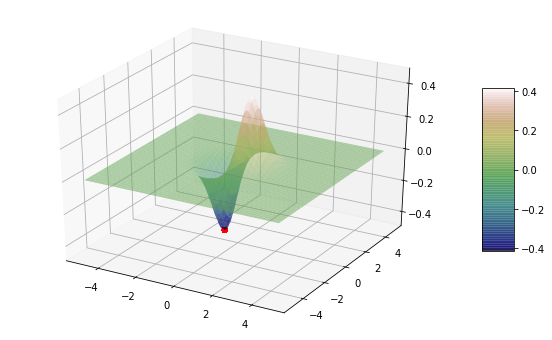

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors = gradient_descent(start=np.array([-(2**(1/2))/2,0]).astype(float), learn_rate=1, n_iter=1000)
print("Position:",-(2**(1/2))/2,",",0," Min:",z(vector))

ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Position: -3 , -0.3  Min: -0.42888194248035333


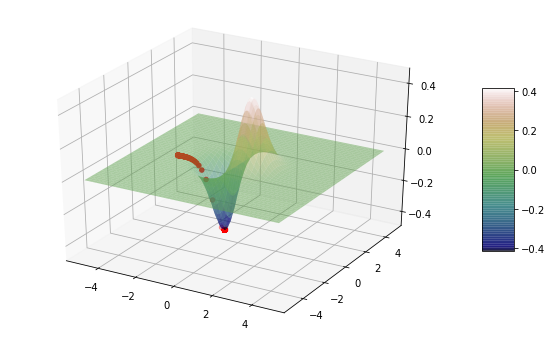

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors = gradient_descent(start=np.array([-3,-.3]).astype(float), learn_rate=1, n_iter=1000)
print("Position:",-3,",",-.3," Min:",z(vector))

ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Discussion: Starting at the global max leads gradient descent to reach a local min at about 0. Starting at the global min leads gradient descent to stay at that min.

### Part b

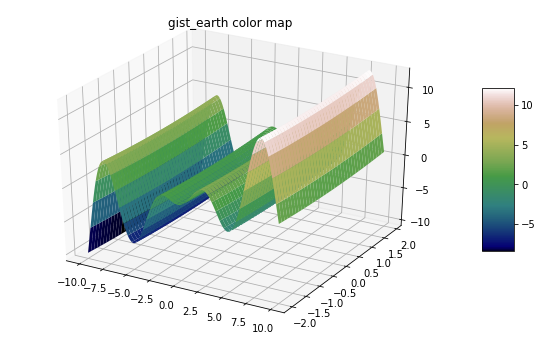

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

x = np.arange(-10,10,0.1)
y = np.arange(-2,2,0.1)
X,Y = np.meshgrid(x,y)
Z = np.sin(X)*X + X/2 + (Y**2)/10

mycmap = plt.get_cmap('gist_earth')
ax1.set_title('gist_earth color map')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

In [ ]:
def gradient(X,Y):
  return np.array([X*np.cos(X)+np.sin(X)+1/2,Y/5]).astype(float)

In [ ]:
def z(vector):
  return np.sin(vector[0])*vector[0]+vector[0]/2+(vector[1]**2)/10

In [ ]:
# Runs until convergance
def gradient_descent(start, learn_rate, threshold):
    vector = start
    vectors = np.array([vector[0],vector[1],z(vector)])
    min_n_iter = 0
    while True:
        prev_vector = vector.copy()
        diff = -learn_rate * gradient(vector[0],vector[1])
        vector += diff.astype(float)
        vectors = np.append(vectors,np.array([vector[0],vector[1],z(vector)]))
        min_n_iter = min_n_iter + 1
        if abs(z(vector)-z(prev_vector)) < threshold:
          break
    return vector, np.array(vectors).reshape(min_n_iter+1,3), (min_n_iter+1)

Learning Rate: 0.1  Starting Position: 7.8 , 1  Min Number Iterations: 37
Min Point: 4.815307233892957 , 0.4832131282057167 , -2.3588243576700187


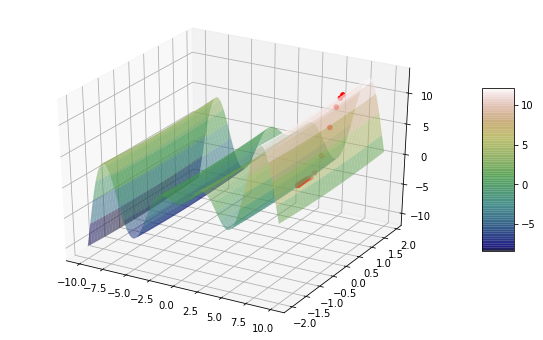

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors, min_n_iter = gradient_descent(start=np.array([7.8,1]).astype(float), learn_rate=.1, threshold=0.001)
print("Learning Rate:",.1," Starting Position:",7.8,",",1," Min Number Iterations:",min_n_iter)
print("Min Point:",vector[0],",",vector[1],",",z(vector))
ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

### Part c

Learning Rate: 1  Starting Position: 7.8 , 1  Min Number Iterations: 14
Min Point: -0.31323657225790835 , 0.05497558138880001 , -0.05979554727024183


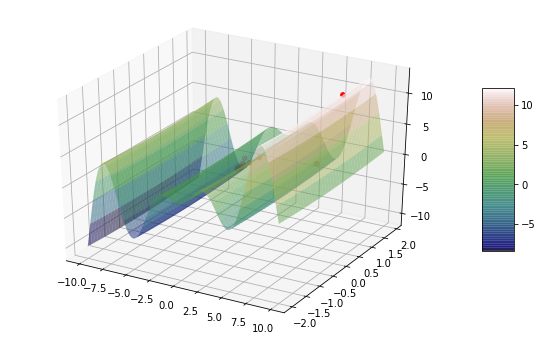

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors, min_n_iter = gradient_descent(start=np.array([7.8,1]).astype(float), learn_rate=1, threshold=0.001)
print("Learning Rate:",1," Starting Position:",7.8,",",1," Min Number Iterations:",min_n_iter)
print("Min Point:",vector[0],",",vector[1],",",z(vector))
ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Discussion: In this case the larger learning rate actually gets stuck at a local minimum that is worse than the minimum found by the smaller learning rate.

Learning Rate: 0.1  Starting Position: 0 , 0  Min Number Iterations: 71
Min Point: -11.12994000578281 , -0.4862451629953237 , -16.57094685918652


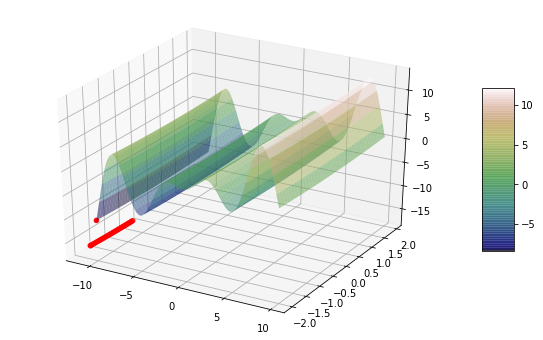

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors, min_n_iter = gradient_descent(start=np.array([-10,-2]).astype(float), learn_rate=.1, threshold=0.001)
print("Learning Rate:",.1," Starting Position:",0,",",0," Min Number Iterations:",min_n_iter)
print("Min Point:",vector[0],",",vector[1],",",z(vector))
ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Learning Rate: 0.1  Starting Position: 0 , 0  Min Number Iterations: 71
Min Point: 11.040783781032538 , -0.4862451629953237 , -5.485467256728987


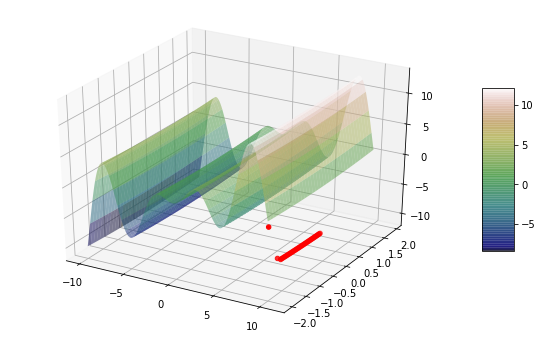

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors, min_n_iter = gradient_descent(start=np.array([10,-2]).astype(float), learn_rate=.1, threshold=0.001)
print("Learning Rate:",.1," Starting Position:",0,",",0," Min Number Iterations:",min_n_iter)
print("Min Point:",vector[0],",",vector[1],",",z(vector))
ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Learning Rate: 0.1  Starting Position: 0 , 0  Min Number Iterations: 10
Min Point: -0.2180450492559649 , 0.0 , -0.061854719579348474


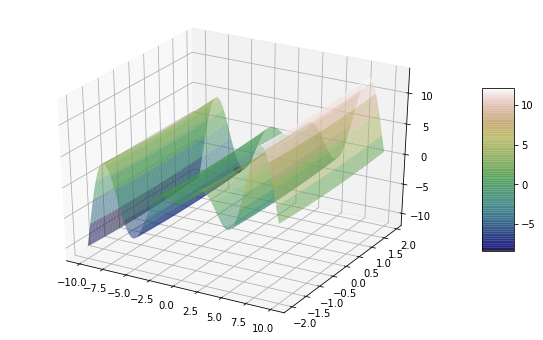

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap,alpha=.5)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

vector, vectors, min_n_iter = gradient_descent(start=np.array([0,0]).astype(float), learn_rate=.1, threshold=0.001)
print("Learning Rate:",.1," Starting Position:",0,",",0," Min Number Iterations:",min_n_iter)
print("Min Point:",vector[0],",",vector[1],",",z(vector))
ax1.scatter(vectors[:,0],vectors[:,1],vectors[:,2],c="r")
plt.show()

Discussion: Quite clearly the starting point and learning rate have a large influence on where gradient descent finds as the minimum. Since gradient descent is a greedy algorithm, it only can look ahead by a finite amount amount and only pick which point to go to next that looks the best. This can quite easily lead to getting stuck at a local minimum rather than the global minimum.